<br><br>
<font size='6'><b>TabPFN with RAG for Enhanced Performance on Unseen Small Datasets</b></font>
<br><br>

<br>
<div class=pull-right>
Elif Ertekin Group, University of Illinois at Urbana-Champaign<br>
Chris Wolverton Group, Northwestern University<br>
Implementation by Jaejun Lee
</div>

---

## Project Overview

This work demonstrates the superior performance and efficiency of TabPFN fine-tuning compared to LLM-based fine-tuning approaches when dealing with unseen small datasets. We leverage Retrieval-Augmented Generation (RAG) using OpenAI and Materials Project databases to extract domain-specific knowledge, taking advantage of TabPFN's in-context learning capabilities.

### Key Advantages

* **Superior Performance**: TabPFN fine-tuning outperforms LLM-based fine-tuning on unseen small datasets
* **Training Efficiency**: Significantly more efficient learning process compared to traditional approaches  
* **Robust Feature Handling**: Leverages TabPFN's in-context learning to handle:
  - Variable feature lengths without retraining
  - High proportions of missing (NaN) values
  - Direct deployment with high performance expectations

### Technical Approach

We integrate domain knowledge through RAG systems built on OpenAI and Materials Project foundations, enabling TabPFN to maintain its core strength of immediate deployment on new datasets while achieving enhanced performance through targeted domain expertise.

### Computational Requirements

⚠️ **Google Colab Recommended**: Due to GPU memory requirements and computational intensity, this implementation is optimized for Google Colab environment. Local execution may face GPU resource limitations.

* **Platform**: Google Colab Pro/Pro+ recommended for optimal performance
* **GPU Requirements**: High memory GPU access for TabPFN operations
* **Runtime**: Designed and tested primarily in Colab ecosystem. You can change cpu to gpu by clicking Runtime - change runtime type!

📋 **Quick Start in Colab**: Simply upload the notebook to Google Colab and run all cells sequentially.

---

In [3]:
!git clone https://github.com/Ahri111/ZEROMAT.git
%cd ZEROMAT

Cloning into 'ZEROMAT'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 68 (delta 28), reused 37 (delta 13), pack-reused 15 (from 1)
Receiving objects: 100% (68/68), 44.91 MiB | 20.12 MiB/s, done.
Resolving deltas: 100% (33/33), done.
Updating files: 100% (12/12), done.
/content/ZEROMAT


In [2]:
!pip install tabpfn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.4/136.4 kB 13.7 MB/s eta 0:00:00


## TabPFN without RAG

In this section, we compare TabPFN performance against LLM-based fine-tuning approaches without RAG enhancement. While TabPFN utilizes LLM-based embeddings compressed to 100 dimensions via PCA, the LLM-based fine-tuning approach employs pre-saved CSV embedding layers without dimensionality reduction, followed by Optuna hyperparameter optimization for neural network architecture construction.

Despite the information loss from dimensionality reduction, we demonstrate that TabPFN achieves superior performance and significantly higher efficiency compared to traditional LLM fine-tuning methods.

**Experimental Setup:**
- **TabPFN**: LLM embeddings → PCA (100D) → Direct training
- **LLM Fine-tuning**: Full-dimensional embeddings → Optuna optimization → Custom neural architecture
- **Evaluation**: Performance metrics and computational efficiency comparison

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

from tabpfn import TabPFNRegressor

In [ ]:
small = pd.read_csv("data/small.csv")
X_full = small.drop(['material_id', 'bandgap', "Unnamed: 0.1", "Unnamed: 0"], axis=1)
y_full = small["bandgap"]

In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full,
    test_size=0.2,
    random_state=42
)

In [ ]:
import time
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tabpfn import TabPFNRegressor

def get_gpu_memory_mb():
    if torch.cuda.is_available():
        return torch.cuda.memory_allocated() / 1024 / 1024
    return 0

print(f"Train: {X_train.shape}, {y_train.shape}")  # (8000, 100), (8000,)
print(f"Test: {X_test.shape}, {y_test.shape}")     # (2000, 100), (2000,)

# GPU Memory Check before training
if torch.cuda.is_available():
    torch.cuda.empty_cache()
gpu_memory_before = get_gpu_memory_mb()

# TabPFN training
print("\n🚀 Training TabPFN...")
start_time = time.time()

regressor = TabPFNRegressor(device="cuda")
regressor.fit(X_train, y_train)

training_time = time.time() - start_time
gpu_memory_after = get_gpu_memory_mb()

print(f"✅ Training time: {training_time:.2f}s")
print(f"🖥️ GPU Memory used: {gpu_memory_after - gpu_memory_before:.1f}MB")

# Predictions
print("\n📈 Predicting...")
start_time = time.time()

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

prediction_time = time.time() - start_time
print(f"✅ Prediction time: {prediction_time:.2f}s")

# Metrics for performance
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\n📈 Results:")
print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# GPU Nemory remove
if torch.cuda.is_available():
    torch.cuda.empty_cache()

Train: (8000, 103), (8000,)
Test: (2000, 103), (2000,)

🚀 Training TabPFN...
✅ Training time: 7.51s
🖥️ GPU Memory used: -0.0MB

📈 Predicting...
✅ Prediction time: 62.34s

📈 Results:
Test R²: 0.5788
Test RMSE: 1.0285
Test MAE: 0.6559


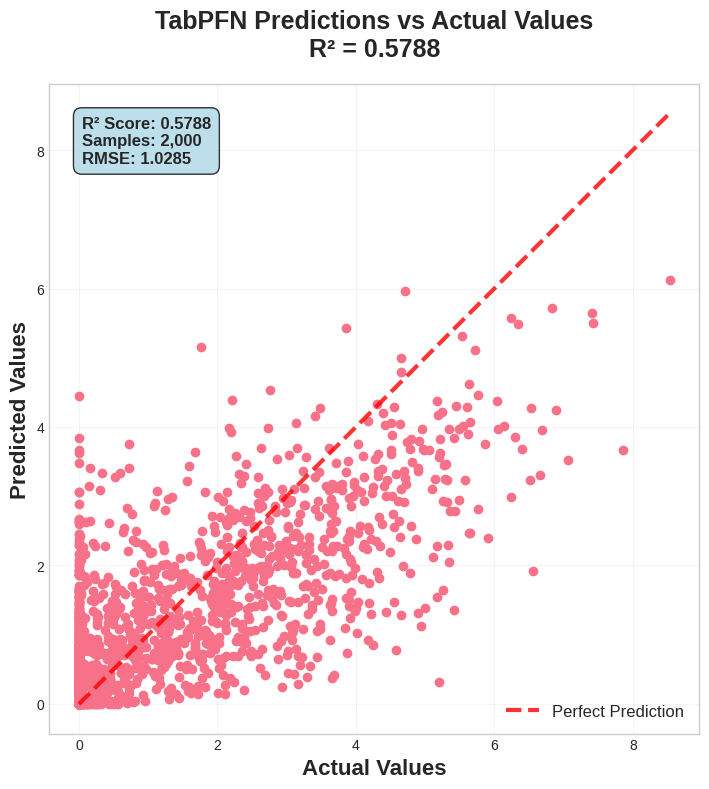

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score

# Set beautiful style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Create figure with high DPI for crisp appearance
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)

# Calculate R² score
test_r2 = r2_score(y_test, y_test_pred)

# Create scatter plot with gradient colors
scatter = ax.scatter(y_test, y_test_pred)

ax.set_xlabel('Actual Values', fontsize=16, fontweight='bold')
ax.set_ylabel('Predicted Values', fontsize=16, fontweight='bold')
ax.set_title(f'TabPFN Predictions vs Actual Values\nR² = {test_r2:.4f}',
             fontsize=18, fontweight='bold', pad=20)

min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
ax.plot([min_val, max_val], [min_val, max_val],
        'r--', linewidth=3, alpha=0.8, label='Perfect Prediction')

# Add statistics text box
textstr = f'R² Score: {test_r2:.4f}\nSamples: {len(y_test):,}\nRMSE: {np.sqrt(np.mean((y_test - y_test_pred)**2)):.4f}'
props = dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props, fontweight='bold')

# Grid and legend
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.legend(loc='lower right', fontsize=12, framealpha=0.9)

# Equal aspect ratio for square plot
ax.set_aspect('equal', adjustable='box')

# Tight layout
plt.tight_layout()
plt.show()

### Dataset Download Required

⚠️ **Download Required**: Due to file size limitations on GitHub, you need to download the dataset separately:

**Download Link**: [small_llm.csv](https://drive.google.com/file/d/154CpSGq35rSDKKWChwHPBsb-OY58sXtt/view?usp=sharing)

📁 **Instructions**:
1. Click the link above to access Google Drive
2. Download `small_llm.csv` file
3. Upload the file to your Colab environment or place it in your working directory
4. The file contains LLM embeddings for comparison experiments

💾 **File Info**: This dataset contains pre-computed LLM embeddings that are too large for GitHub storage limits but essential for the LLM fine-tuning comparison

In [ ]:
llm_data = pd.read_csv("/content/smallLLM.csv")

In [ ]:
llm_data.head()

,Unnamed: 0,material_id,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,...,embedding_503,embedding_504,embedding_505,embedding_506,embedding_507,embedding_508,embedding_509,embedding_510,embedding_511,bandgap
0,31200,mp-765415,-0.000061,-0.000127,0.000138,-0.000037,-4.184862e-05,-0.000130,-1.174652e-06,-0.000012,...,0.000087,-0.000002,0.000110,-0.000119,2.051651e-11,0.000109,-0.000237,0.000177,-4.081564e-07,0.5936
1,84265,mp-567749,0.000003,0.000014,0.000002,-0.000051,1.448251e-06,0.000010,-1.155559e-06,-0.000008,...,0.000016,0.000002,0.000019,-0.000005,6.885081e-12,-0.000006,-0.000004,-0.000008,-1.388248e-07,0.0000
2,74277,mp-601323,0.000004,0.000020,0.000006,-0.000055,5.220358e-07,0.000007,-1.155601e-06,-0.000002,...,0.000013,-0.000003,0.000013,-0.000006,7.004161e-12,0.000010,-0.000007,-0.000005,-1.420399e-07,0.0000
3,14353,mp-1040361,-0.003843,-0.007291,-0.006196,-0.000526,2.500759e-03,0.002182,-9.821180e-07,0.000106,...,-0.008474,-0.009016,0.010346,-0.008515,-1.775559e-11,0.003490,-0.003764,0.002420,1.567994e-07,0.2338
4,50938,mp-1199324,0.000077,0.000037,0.000058,0.000032,-1.933879e-05,-0.000012,-1.163061e-06,-0.000054,...,0.000075,0.000125,0.000031,-0.000044,1.569614e-11,-0.000029,-0.000027,-0.000060,-3.845380e-07,0.4864


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 13.7 MB/s eta 0:00:00


In [ ]:
target_columns=['bandgap', 'material_id', "Unnamed: 0"]
feature_columns = [col for col in llm_data.columns if col not in target_columns]
target_data = ["bandgap"]

llm_X = llm_data[feature_columns]
llm_y = llm_data[target_data]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    llm_X, llm_y,
    test_size=0.2,
    random_state=42
)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

class FlexibleNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_layers, dropout_rate, activation='ReLU'):
        super(FlexibleNN, self).__init__()

        layers = []
        prev_dim = input_dim

        # Hidden layers
        for hidden_dim in hidden_layers:
            layers.extend([
                nn.Dropout(dropout_rate),
                nn.Linear(prev_dim, hidden_dim),
                self._get_activation(activation),
            ])
            prev_dim = hidden_dim

        # Output layer
        self.network = nn.Sequential(*layers)
        self.linear_regressor = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(prev_dim, output_dim)
        )

    def _get_activation(self, activation):
        activations = {
            'ReLU': nn.ReLU(),
            'Tanh': nn.Tanh(),
            'GELU': nn.GELU(),
            'LeakyReLU': nn.LeakyReLU()
        }
        return activations.get(activation, nn.ReLU())

    def forward(self, x):
        x = self.network(x)
        x = self.linear_regressor(x)
        return x

# train function
def train_model(model, train_loader, val_loader, lr, epochs, device):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=0.5)

    model.to(device)
    best_val_loss = float('inf')
    patience_counter = 0
    patience = 20

    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0
        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                outputs = model(batch_x)
                val_loss += criterion(outputs, batch_y).item()

        val_loss /= len(val_loader)
        scheduler.step(val_loss)

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                break

    return best_val_loss

# Optuna objective
def objective(trial, X_train, y_train, X_val, y_val, input_dim, output_dim, device):

    n_layers = trial.suggest_int('n_layers', 1, 4)
    hidden_layers = []

    for i in range(n_layers):
        layer_size = trial.suggest_int(f'layer_{i}_size', 32, 512, step=32)
        hidden_layers.append(layer_size)

    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_int('batch_size', 16, 128, step=16)
    activation = trial.suggest_categorical('activation', ['ReLU', 'Tanh', 'GELU', 'LeakyReLU'])

    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    model = FlexibleNN(input_dim, output_dim, hidden_layers, dropout_rate, activation)

    val_loss = train_model(model, train_loader, val_loader, lr, epochs=100, device=device)

    return val_loss

def run_optuna_tuning(X_train, y_train, n_trials=100):
    """
    X_train: numpy array or torch tensor, shape (n_samples, n_features)
    y_train: numpy array or torch tensor, shape (n_samples, n_targets)
    """

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    if isinstance(X_train, torch.Tensor):
        X_train = X_train.numpy()
    if isinstance(y_train, torch.Tensor):
        y_train = y_train.numpy()

    if y_train.ndim == 1:
        y_train = y_train.reshape(-1, 1)

    X_scaled = scaler_X.fit_transform(X_train)
    y_scaled = scaler_y.fit_transform(y_train)

    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_scaled, y_scaled, test_size=0.2, random_state=42
    )

    X_train_tensor = torch.FloatTensor(X_train_split)
    y_train_tensor = torch.FloatTensor(y_train_split)
    X_val_tensor = torch.FloatTensor(X_val_split)
    y_val_tensor = torch.FloatTensor(y_val_split)

    input_dim = X_train_tensor.shape[1]
    output_dim = y_train_tensor.shape[1]

    print(f"Input dimension: {input_dim}")
    print(f"Output dimension: {output_dim}")
    print(f"Training samples: {len(X_train_tensor)}")
    print(f"Validation samples: {len(X_val_tensor)}")

    study = optuna.create_study(direction='minimize')

    study.optimize(
        lambda trial: objective(trial, X_train_tensor, y_train_tensor,
                              X_val_tensor, y_val_tensor, input_dim, output_dim, device),
        n_trials=n_trials
    )

    print("Best trial:")
    print(f"  Value: {study.best_trial.value}")
    print("  Params:")
    for key, value in study.best_trial.params.items():
        print(f"    {key}: {value}")

    best_params = study.best_trial.params
    hidden_layers = []
    for i in range(best_params['n_layers']):
        hidden_layers.append(best_params[f'layer_{i}_size'])

    best_model = FlexibleNN(
        input_dim=input_dim,
        output_dim=output_dim,
        hidden_layers=hidden_layers,
        dropout_rate=best_params['dropout_rate'],
        activation=best_params['activation']
    )

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    trials = study.trials
    values = [trial.value for trial in trials]
    best_values = []
    best_so_far = float('inf')
    for value in values:
        if value < best_so_far:
            best_so_far = value
        best_values.append(best_so_far)

    ax1.plot(values, 'b-', alpha=0.6, label='Trial values')
    ax1.plot(best_values, 'r-', linewidth=2, label='Best value')
    ax1.set_xlabel('Trial')
    ax1.set_ylabel('Objective Value')
    ax1.set_title('Optimization History')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    param_counts = {}
    for trial in trials:
        for key, value in trial.params.items():
            if key not in param_counts:
                param_counts[key] = []
            param_counts[key].append((value, trial.value))

    top_10_percent = int(len(trials) * 0.1) + 1
    sorted_trials = sorted(trials, key=lambda x: x.value)[:top_10_percent]

    best_params_text = "Top 10% Trials Common Params:\n"
    for key in ['n_layers', 'layer_0_size', 'activation']:
        if key in sorted_trials[0].params:
            values = [trial.params[key] for trial in sorted_trials]
            if isinstance(values[0], str):
                from collections import Counter
                most_common = Counter(values).most_common(1)[0]
                best_params_text += f"{key}: {most_common[0]} ({most_common[1]}/{len(values)})\n"
            else:
                best_params_text += f"{key}: {np.mean(values):.2f} ± {np.std(values):.2f}\n"

    ax2.text(0.1, 0.5, best_params_text, transform=ax2.transAxes,
             fontsize=10, verticalalignment='center')
    ax2.set_title('Best Parameters Analysis')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

    return best_model, study, (scaler_X, scaler_y)

In [ ]:
best_model, study, scalers = run_optuna_tuning(X_train, y_train, n_trials=50)

In [ ]:
class OptimalNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(OptimalNN, self).__init__()

        # Hidden layer
        self.network = nn.Sequential(
            nn.Dropout(0.183),
            nn.Linear(input_dim, 32),
            nn.GELU(),
        )

        # Output layer (당신 스타일대로)
        self.linear_regressor = nn.Sequential(
            nn.Dropout(0.183),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        x = self.network(x)
        x = self.linear_regressor(x)
        return x

def predict_test(X_test, best_model, scalers, device='cpu'):
    scaler_X, scaler_y = scalers

    X_test_scaled = scaler_X.transform(X_test)
    X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

    best_model.eval()
    with torch.no_grad():
        y_pred_scaled = best_model(X_test_tensor)
        y_pred = scaler_y.inverse_transform(y_pred_scaled.cpu().numpy())

    return y_pred

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
input_dim = X_train.shape[1]
output_dim = 1
model = OptimalNN(input_dim, output_dim)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X_train)
y_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

dataset = TensorDataset(torch.FloatTensor(X_scaled), torch.FloatTensor(y_scaled))
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

optimizer = optim.Adam(model.parameters(), lr=0.0002857)
criterion = nn.MSELoss()

def predict_test(X_test, best_model, scalers, device='cpu'):

    scaler_X, scaler_y = scalers

    X_test_scaled = scaler_X.transform(X_test)
    X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

    best_model.eval()
    with torch.no_grad():
        y_pred_scaled = best_model(X_test_tensor)
        y_pred = scaler_y.inverse_transform(y_pred_scaled.cpu().numpy())

    return y_pred

model.train()
for epoch in range(100):
    for batch_x, batch_y in dataloader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

predictions = predict_test(X_test, model, (scaler_X, scaler_y))

Epoch 0, Loss: 0.3549
Epoch 20, Loss: 1.1861
Epoch 40, Loss: 0.9750
Epoch 60, Loss: 1.4815
Epoch 80, Loss: 0.8684


In [ ]:
test_r2 = r2_score(y_test, predictions)
test_rmse = np.sqrt(mean_squared_error(y_test, predictions))
test_mae = mean_absolute_error(y_test, predictions)

print(f"\n📈 Results:")
print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")


📈 Results:
Test R²: 0.3881
Test RMSE: 1.2396
Test MAE: 0.7999


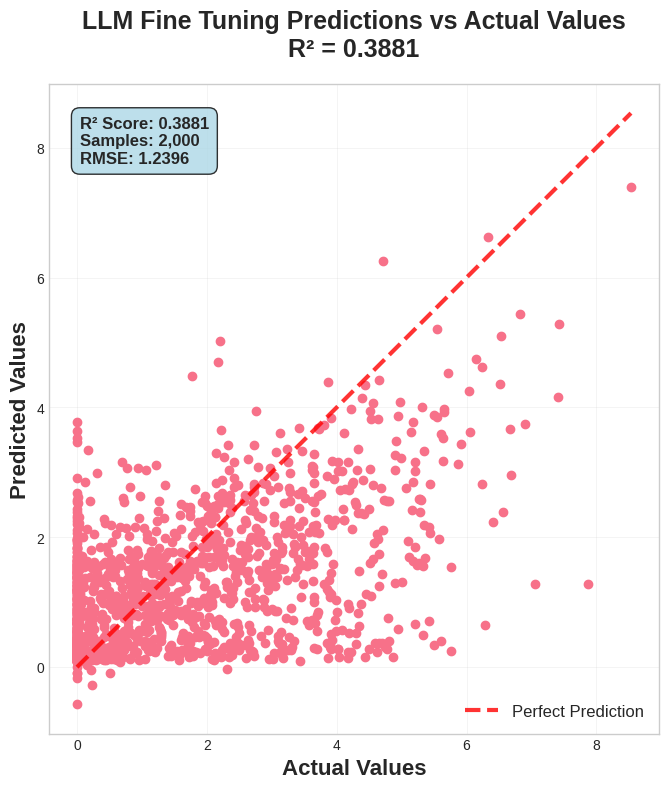

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score

# Set beautiful style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Create figure with high DPI for crisp appearance
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)

# Calculate R² score
test_r2 = r2_score(y_test, predictions)

# Create scatter plot with gradient colors
scatter = ax.scatter(y_test, predictions)

ax.set_xlabel('Actual Values', fontsize=16, fontweight='bold')
ax.set_ylabel('Predicted Values', fontsize=16, fontweight='bold')
ax.set_title(f'LLM Fine Tuning Predictions vs Actual Values\nR² = {test_r2:.4f}',
             fontsize=18, fontweight='bold', pad=20)

min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
ax.plot([min_val, max_val], [min_val, max_val],
        'r--', linewidth=3, alpha=0.8, label='Perfect Prediction')

# Add statistics text box
textstr = f'R² Score: {test_r2:.4f}\nSamples: {len(y_test):,}\nRMSE: {np.sqrt(np.mean((y_test - predictions)**2)):.4f}'
props = dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props, fontweight='bold')

# Grid and legend
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.legend(loc='lower right', fontsize=12, framealpha=0.9)

# Equal aspect ratio for square plot
ax.set_aspect('equal', adjustable='box')

# Tight layout
plt.tight_layout()
plt.show()

## TabPFN with RAG Integration

This section demonstrates our novel approach combining TabPFN with Retrieval-Augmented Generation (RAG) for real-time domain knowledge integration. The system dynamically retrieves materials science expertise from OpenAI and Materials Project databases to enhance feature selection and improve prediction performance.

### Algorithm Overview

Our RAG-enhanced TabPFN framework operates through the following pipeline:

1. **Query Processing**: User defines prediction goals (e.g., "predict bandgap for perovskites")
2. **Domain Knowledge Retrieval**: RAG system queries OpenAI GPT models with materials science context
3. **Feature Recommendation**: AI recommends physics-informed features based on domain expertise
4. **TabPFN Training**: Enhanced dataset trains TabPFN with improved feature representation
5. **Real-time Adaptation**: System can dynamically adjust features based on new domain insights

### Key Technical Components

**RAG Feature Recommender (`rag.py`)**:
- Leverages GPT-4 with materials science prompts
- Maps user queries to relevant Materials Project features
- Provides physics-based justification for feature selection

**Materials Project Data Fetcher (`production_mp_fetcher.py`)**:
- Retrieves high-quality experimental/computational data
- Handles batch processing for large datasets
- Validates and cleans Materials Project IDs automatically

**Dynamic Integration**:
- Real-time feature recommendation based on specific prediction tasks
- Automatic data augmentation with domain-relevant descriptors
- Seamless integration with TabPFN's in-context learning capabilities

### Setup and Execution

**Repository**: [https://github.com/Ahri111/ZEROMAT.git](https://github.com/Ahri111/ZEROMAT.git)

**Required API Keys Configuration**:

1. **OpenAI API Key**: Required for RAG feature recommendations
   - Get from: [https://platform.openai.com/api-keys](https://platform.openai.com/api-keys)
   - **Edit `rag.py` line 8**: Change `API_KEY = ""` to `API_KEY = "your-openai-key-here"`

2. **Materials Project API Key**: Required for data augmentation
   - Get from: [https://next-gen.materialsproject.org/api](https://next-gen.materialsproject.org/api)
   - **Edit `production_mp_fetcher.py`**: Add your MP API key or set as environment variable

**Execution Steps**:
```bash
# 1. Clone repository
git clone https://github.com/Ahri111/ZEROMAT.git
cd ZEROMAT

# 2. Install dependencies
pip install -r requirements.txt

# 3. Configure API keys (REQUIRED)
# Edit rag.py: API_KEY = "your-openai-api-key"
# Edit production_mp_fetcher.py: Add MP API key

# 4. Run RAG feature recommendation
python rag.py

# 5. Run data augmentation
python production_mp_fetcher.py

# 6. Execute main TabPFN notebook
# Open UnseenSmallDataPrediction.ipynb in Colab/Jupyter

In [ ]:
small_aug = pd.read_csv("data/Aug_small.csv")
small_X_full = small_aug.drop(['material_id', 'bandgap', "Unnamed: 0.1", "Unnamed: 0"], axis=1)
small_y_full = small_aug["bandgap"]

As shown through the results in the cell below, features that require high-level computations have more **NaN values** compared to other descriptors. We will show that TabPFN is robust to this approach.

In [ ]:
small_X_full.head()


,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,dielectric_total,dielectric_ionic,dielectric_electronic,universal_anisotropy,bulk_modulus_voigt,bulk_modulus_reuss,bulk_modulus_vrh,shear_modulus_voigt,shear_modulus_reuss,shear_modulus_vrh
0,-12.744738,2.183051,0.106251,-0.224815,0.170664,0.298160,0.003000,-0.020978,0.039676,0.184637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-12.890752,2.519954,-0.317345,0.486014,-0.212129,-0.052167,-0.007637,-0.014662,-0.023601,-0.056745,...,NaN,NaN,NaN,0.071,169.44,169.238,169.339,89.555,88.328,88.942
2,-12.889920,2.522854,-0.317283,0.474633,-0.205218,-0.048187,-0.003507,-0.016517,-0.021376,-0.052055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15.909705,-5.996787,10.578456,1.495372,-4.825920,3.850528,-4.755868,-0.034722,3.873718,-3.623547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-12.865477,2.397519,-0.126945,0.004259,0.088404,0.021856,-0.059183,-0.044416,0.063944,0.065725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(
    small_X_full, small_y_full,
    test_size=0.2,
    random_state=42
)

In [ ]:
import time
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tabpfn import TabPFNRegressor

def get_gpu_memory_mb():
    if torch.cuda.is_available():
        return torch.cuda.memory_allocated() / 1024 / 1024
    return 0

print(f"Train: {X_train.shape}, {y_train.shape}")  # (8000, 100), (8000,)
print(f"Test: {X_test.shape}, {y_test.shape}")     # (2000, 100), (2000,)

# GPU Memory Check before training
if torch.cuda.is_available():
    torch.cuda.empty_cache()
gpu_memory_before = get_gpu_memory_mb()

# TabPFN training
print("\n🚀 Training TabPFN...")
start_time = time.time()

regressor = TabPFNRegressor(device="cuda")
regressor.fit(X_train, y_train)

training_time = time.time() - start_time
gpu_memory_after = get_gpu_memory_mb()

print(f"✅ Training time: {training_time:.2f}s")
print(f"🖥️ GPU Memory used: {gpu_memory_after - gpu_memory_before:.1f}MB")

# Predictions
print("\n📈 Predicting...")
start_time = time.time()

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

prediction_time = time.time() - start_time
print(f"✅ Prediction time: {prediction_time:.2f}s")

# Metrics for performance
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\n📈 Results:")
print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# GPU Nemory remove
if torch.cuda.is_available():
    torch.cuda.empty_cache()

Train: (8000, 127), (8000,)
Test: (2000, 127), (2000,)

🚀 Training TabPFN...


tabpfn-v2-regressor.ckpt:   0%|          | 0.00/44.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1057: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1081: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


✅ Training time: 14.15s
🖥️ GPU Memory used: 0.1MB

📈 Predicting...


/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1057: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1081: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


✅ Prediction time: 78.32s

📈 Results:
Test R²: 0.8261
Test RMSE: 0.6608
Test MAE: 0.3652


/tmp/ipython-input-3168535691.py:43: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


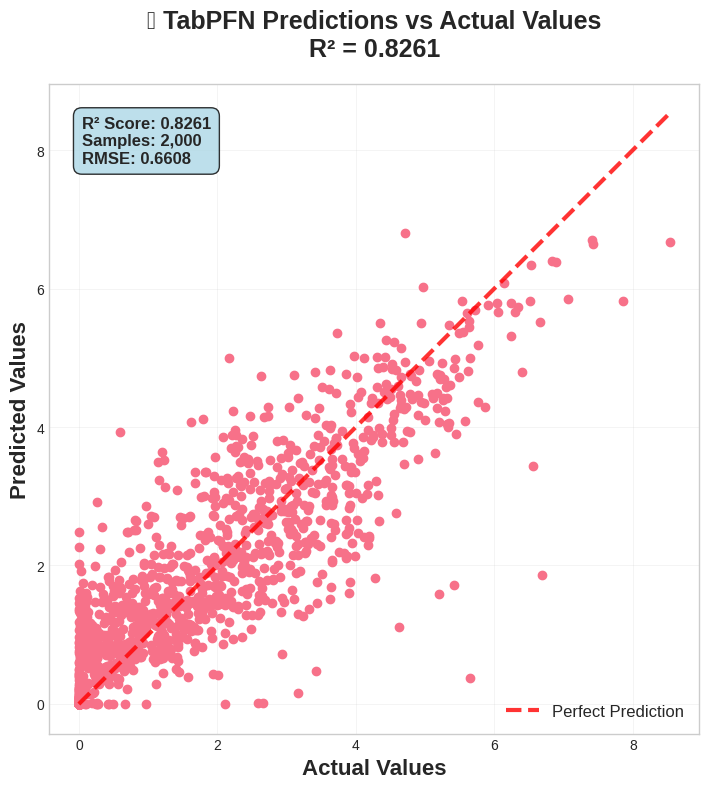

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score

# Set beautiful style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Create figure with high DPI for crisp appearance
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)

# Calculate R² score
test_r2 = r2_score(y_test, y_test_pred)

# Create scatter plot with gradient colors
scatter = ax.scatter(y_test, y_test_pred)

ax.set_xlabel('Actual Values', fontsize=16, fontweight='bold')
ax.set_ylabel('Predicted Values', fontsize=16, fontweight='bold')
ax.set_title(f'🎯 TabPFN Predictions vs Actual Values\nR² = {test_r2:.4f}',
             fontsize=18, fontweight='bold', pad=20)

min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
ax.plot([min_val, max_val], [min_val, max_val],
        'r--', linewidth=3, alpha=0.8, label='Perfect Prediction')

# Add statistics text box
textstr = f'R² Score: {test_r2:.4f}\nSamples: {len(y_test):,}\nRMSE: {np.sqrt(np.mean((y_test - y_test_pred)**2)):.4f}'
props = dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props, fontweight='bold')

# Grid and legend
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.legend(loc='lower right', fontsize=12, framealpha=0.9)

# Equal aspect ratio for square plot
ax.set_aspect('equal', adjustable='box')

# Tight layout
plt.tight_layout()
plt.show()

In [ ]:
small = pd.read_csv("data/small.csv")
X_full = small_aug.drop(['material_id', 'bandgap', "Unnamed: 0.1", "Unnamed: 0"], axis=1)
y_full = small_aug["bandgap"]

## Dataset Clustering for TabPFN 10k Sample Limitation

### Challenge: TabPFN Sample Size Limitation

TabPFN has a built-in limitation of approximately **10,000 samples** per training session. Since our materials dataset often contains much larger sample sizes, we developed an intelligent clustering approach to segment the data while preserving chemical and structural similarities.

### Clustering Strategy

Our approach handles large datasets by implementing a **two-stage clustering methodology**:

#### Stage 1: Initial K-Means Clustering
- Apply K-Means clustering (k=4) to identify natural chemical groupings
- Use standardized features to ensure proper distance metrics
- Group materials with similar chemical and structural properties

#### Stage 2: Size-Based Subdivision
- **Target Size**: 8,000 samples per cluster (buffer below 10k limit)
- **Large Cluster Handling**: Automatically split clusters exceeding target size
- **Preservation Strategy**: Maintain chemical similarity within each split
- **Random Shuffling**: Ensure fair distribution across train/test/validation sets

#### Data Splitting Protocol
Each final cluster undergoes stratified splitting:
- **Training Set**: 70% of cluster data
- **Test Set**: 20% of cluster data  
- **Validation Set**: 10% of cluster data

### Technical Implementation

**Key Features**:
- Automatic missing value handling and data cleaning
- PCA visualization for cluster quality assessment
- Reproducible splits using fixed random seeds
- Comprehensive data verification and statistics

**Benefits**:
- Respects TabPFN's 10k sample constraint
- Maintains chemical coherence within clusters
- Enables parallel processing of large datasets
- Provides robust train/test/validation splits

### Visualization and Validation

The system generates comprehensive visualizations:
- Original vs. final cluster distributions
- Train/test/validation data mapping via PCA
- Cluster size verification and statistics
- Data integrity checks

This clustering approach ensures that TabPFN can effectively process large materials datasets while maintaining the chemical and structural relationships crucial for accurate property predictions.

=== Complete TabPFN Pipeline with Clustering ===
Loading and preparing data...
Original data shape: (39510, 128)
PCA columns count: 103
PCA data shape: (39510, 103)
Clean data shape: (39510, 103)
Removed samples: 0

Performing K-means clustering on PCA data...
Sample count per cluster:
Cluster 0: 31992 samples
Cluster 1: 369 samples
Cluster 2: 6963 samples
Cluster 3: 186 samples

Preparing full feature data for each cluster...
Full features shape after mask: (39510, 128)

Cluster 0: 31992 samples -> splitting into 3 parts
  New Cluster 0: 10664 samples
  New Cluster 1: 10664 samples
  New Cluster 2: 10664 samples

Cluster 1: 369 samples -> keeping as Cluster 3

Cluster 2: 6963 samples -> keeping as Cluster 4

Cluster 3: 186 samples -> keeping as Cluster 5

Splitting each cluster into train/test/validation (70%/20%/10%)...
Cluster 0: Train=7464, Test=2133, Val=1067
Cluster 1: Train=7464, Test=2133, Val=1067
Cluster 2: Train=7464, Test=2133, Val=1067
Cluster 3: Train=258, Test=74, Val=37

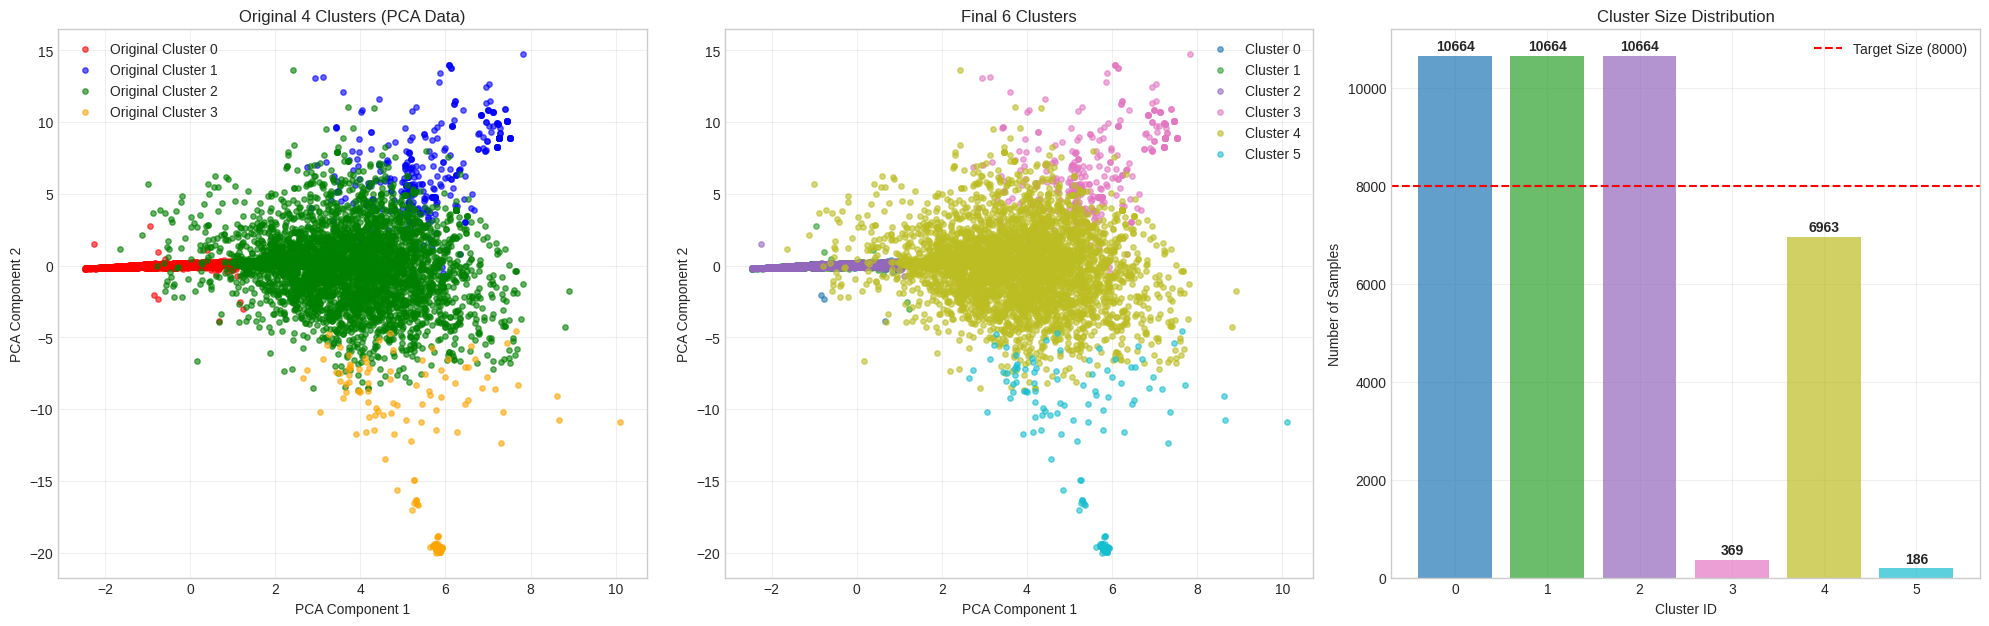


TRAINING TABPFN ON EACH CLUSTER
Initial - GPU memory allocated: 0.01 GB, cached: 0.02 GB

Processing Cluster 0...
  Dataset size: Train=7464, Test=2133
  Features: 128
Before Cluster 0 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
After TabPFN creation - Cluster 0 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
  Fitting TabPFN...


/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1057: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1081: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


After fit - Cluster 0 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
  Predicting...


/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1057: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1081: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


After predict - Cluster 0 - GPU memory allocated: 0.01 GB, cached: 16.68 GB
After cleanup - Cluster 0 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
----------------------------------------

Processing Cluster 1...
  Dataset size: Train=7464, Test=2133
  Features: 128
Before Cluster 1 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
After TabPFN creation - Cluster 1 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
  Fitting TabPFN...


/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1057: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1081: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


After fit - Cluster 1 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
  Predicting...


/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1057: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1081: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


After predict - Cluster 1 - GPU memory allocated: 0.01 GB, cached: 16.68 GB
After cleanup - Cluster 1 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
----------------------------------------

Processing Cluster 2...
  Dataset size: Train=7464, Test=2133
  Features: 128
Before Cluster 2 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
After TabPFN creation - Cluster 2 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
  Fitting TabPFN...


/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1057: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1081: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


After fit - Cluster 2 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
  Predicting...


/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1057: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1081: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


After predict - Cluster 2 - GPU memory allocated: 0.01 GB, cached: 16.68 GB
After cleanup - Cluster 2 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
----------------------------------------

Processing Cluster 3...
  Dataset size: Train=258, Test=74
  Features: 128
Before Cluster 3 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
After TabPFN creation - Cluster 3 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
  Fitting TabPFN...


/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


After fit - Cluster 3 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
  Predicting...
After predict - Cluster 3 - GPU memory allocated: 0.01 GB, cached: 3.14 GB
After cleanup - Cluster 3 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
----------------------------------------

Processing Cluster 4...
  Dataset size: Train=4874, Test=1392
  Features: 128
Before Cluster 4 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
After TabPFN creation - Cluster 4 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
  Fitting TabPFN...


/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1057: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:1081: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


After fit - Cluster 4 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
  Predicting...
After predict - Cluster 4 - GPU memory allocated: 0.01 GB, cached: 9.92 GB
After cleanup - Cluster 4 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
----------------------------------------

Processing Cluster 5...
  Dataset size: Train=130, Test=37
  Features: 128
Before Cluster 5 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
After TabPFN creation - Cluster 5 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
  Fitting TabPFN...
After fit - Cluster 5 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
  Predicting...
After predict - Cluster 5 - GPU memory allocated: 0.01 GB, cached: 0.31 GB
After cleanup - Cluster 5 - GPU memory allocated: 0.01 GB, cached: 0.02 GB
----------------------------------------
Final - GPU memory allocated: 0.01 GB, cached: 0.02 GB

PERFORMANCE EVALUATION

1. Combined Performance:
Combined R²: 0.9895
Combined MAE: 0.0056
Combined RMSE: 0.0630

3. Final Results Summary:
Tota

In [6]:
import numpy as np
import pandas as pd
import torch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tabpfn import TabPFNRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import time
# Set style for beautiful plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# GPU memory monitoring function
def check_gpu_memory(stage=""):
    if torch.cuda.is_available():
        allocated = torch.cuda.memory_allocated() / 1e9
        cached = torch.cuda.memory_reserved() / 1e9
        print(f"{stage} - GPU memory allocated: {allocated:.2f} GB, cached: {cached:.2f} GB")

print("=== Complete TabPFN Pipeline with Clustering ===")
print("Loading and preparing data...")

# 1. Data Loading and Preparation
large_data = pd.read_csv("data/Aug_large.csv", low_memory=False)
print(f"Original data shape: {large_data.shape}")

# Define PCA columns for clustering (100 PCA + 3 additional features)
pca_columns = [f'pca{i}' for i in range(1, 101)] + ['metallic_fraction', 'electroneg_diff', 'avg_electroneg']
print(f"PCA columns count: {len(pca_columns)}")

# Target variable
y_all = large_data['bandgap']  # bandgap column

# 2. Data Cleaning (based on PCA columns)
X_pca_only = large_data[pca_columns]
print(f"PCA data shape: {X_pca_only.shape}")

# Remove missing values
mask = ~pd.isna(X_pca_only).any(axis=1) & ~pd.isna(y_all)
X_pca_clean = X_pca_only[mask]
y_clean = y_all[mask]

print(f"Clean data shape: {X_pca_clean.shape}")
print(f"Removed samples: {len(large_data) - len(X_pca_clean)}")

start = time.time()
# 3. Clustering with PCA data
print("\nPerforming K-means clustering on PCA data...")
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_pca_clean)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=20)
cluster_labels = kmeans.fit_predict(X_pca_scaled)

print("Sample count per cluster:")
for i in range(4):
    count = np.sum(cluster_labels == i)
    print(f"Cluster {i}: {count} samples")

# 4. Prepare full feature data for training
print("\nPreparing full feature data for each cluster...")

# All feature columns (except bandgap)
all_feature_columns = [col for col in large_data.columns if col != 'band_gap']
X_all_features = large_data[all_feature_columns]

# Apply same mask to full features
X_all_features_clean = X_all_features[mask]
print(f"Full features shape after mask: {X_all_features_clean.shape}")

# 5. Split large clusters to respect TabPFN's 10k limit
target_size = 8000
final_cluster_data = {}
final_cluster_id = 0

for i in range(4):
    cluster_mask = cluster_labels == i
    X_cluster_full = X_all_features_clean[cluster_mask]
    y_cluster = y_clean[cluster_mask]
    cluster_size = len(X_cluster_full)

    if cluster_size > target_size:
        n_splits = max(2, cluster_size // target_size)
        actual_split_size = cluster_size // n_splits

        print(f"\nCluster {i}: {cluster_size} samples -> splitting into {n_splits} parts")

        indices = np.arange(cluster_size)
        np.random.shuffle(indices)

        for split in range(n_splits):
            start_idx = split * actual_split_size
            end_idx = cluster_size if split == n_splits - 1 else (split + 1) * actual_split_size

            split_indices = indices[start_idx:end_idx]
            X_split = X_cluster_full.iloc[split_indices]
            y_split = y_cluster.iloc[split_indices] if hasattr(y_cluster, 'iloc') else y_cluster[split_indices]

            final_cluster_data[final_cluster_id] = {
                'X': X_split,
                'y': y_split,
                'original_cluster': i,
                'split_part': split,
                'size': len(split_indices)
            }

            print(f"  New Cluster {final_cluster_id}: {len(split_indices)} samples")
            final_cluster_id += 1

    else:
        final_cluster_data[final_cluster_id] = {
            'X': X_cluster_full,
            'y': y_cluster,
            'original_cluster': i,
            'split_part': 0,
            'size': cluster_size
        }

        print(f"\nCluster {i}: {cluster_size} samples -> keeping as Cluster {final_cluster_id}")
        final_cluster_id += 1

# 6. Split each cluster into train/test/validation (70%/20%/10%)
print(f"\nSplitting each cluster into train/test/validation (70%/20%/10%)...")

cluster_splits = {}
for cluster_id, data in final_cluster_data.items():
    X_cluster = data['X']
    y_cluster = data['y']

    # Convert to numpy arrays if needed
    if hasattr(X_cluster, 'values'):
        X_cluster = X_cluster.values
    if hasattr(y_cluster, 'values'):
        y_cluster = y_cluster.values

    # First split: train vs (test+val)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_cluster, y_cluster, test_size=0.3, random_state=42
    )

    # Second split: test vs val
    X_test, X_val, y_test, y_val = train_test_split(
        X_temp, y_temp, test_size=0.33333, random_state=42
    )

    cluster_splits[cluster_id] = {
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test,
        'X_val': X_val,
        'y_val': y_val,
        'original_cluster': data['original_cluster'],
        'split_part': data['split_part']
    }

    print(f"Cluster {cluster_id}: Train={len(X_train)}, Test={len(X_test)}, Val={len(X_val)}")

# 7. Visualization
print("\nCreating visualizations...")

# PCA for visualization
pca_vis = PCA(n_components=2, random_state=42)
X_pca_2d = pca_vis.fit_transform(X_pca_scaled)
print(f"PCA explained variance: {pca_vis.explained_variance_ratio_.sum():.3f}")

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 12))

# Original 4 clusters
ax1 = plt.subplot(2, 3, 1)
colors_orig = ['red', 'blue', 'green', 'orange']
for i in range(4):
    mask = cluster_labels == i
    plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1],
               c=colors_orig[i], label=f'Original Cluster {i}', alpha=0.6, s=15)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Original 4 Clusters (PCA Data)')
plt.legend()
plt.grid(True, alpha=0.3)

# Final clusters after splitting
ax2 = plt.subplot(2, 3, 2)
final_cluster_labels = np.full(len(X_pca_clean), -1)

# Map final clusters back to visualization
for cluster_id, data in final_cluster_data.items():
    original_cluster = data['original_cluster']
    original_mask = cluster_labels == original_cluster

    if data['split_part'] > 0:  # Split cluster
        cluster_size = np.sum(original_mask)
        n_splits = max(2, cluster_size // target_size)
        actual_split_size = cluster_size // n_splits

        np.random.seed(42)
        indices = np.arange(cluster_size)
        np.random.shuffle(indices)

        start_idx = data['split_part'] * actual_split_size
        end_idx = cluster_size if data['split_part'] == n_splits - 1 else (data['split_part'] + 1) * actual_split_size

        split_indices = indices[start_idx:end_idx]
        original_indices = np.where(original_mask)[0]
        final_indices = original_indices[split_indices]

        final_cluster_labels[final_indices] = cluster_id
    else:  # Unsplit cluster
        final_cluster_labels[original_mask] = cluster_id

n_final_clusters = len(final_cluster_data)
colors_final = plt.cm.tab10(np.linspace(0, 1, n_final_clusters))
for cluster_id in range(n_final_clusters):
    mask = final_cluster_labels == cluster_id
    if np.any(mask):
        plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1],
                   c=[colors_final[cluster_id]], label=f'Cluster {cluster_id}', alpha=0.6, s=15)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'Final {n_final_clusters} Clusters')
plt.legend()
plt.grid(True, alpha=0.3)

# Cluster size distribution
ax3 = plt.subplot(2, 3, 3)
cluster_sizes = [data['size'] for data in final_cluster_data.values()]
cluster_ids = list(final_cluster_data.keys())
bars = plt.bar(cluster_ids, cluster_sizes, alpha=0.7, color=colors_final[:len(cluster_ids)])
plt.xlabel('Cluster ID')
plt.ylabel('Number of Samples')
plt.title('Cluster Size Distribution')
plt.axhline(y=target_size, color='red', linestyle='--', label=f'Target Size ({target_size})')
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, size in zip(bars, cluster_sizes):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{size}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 8. Train TabPFN on each cluster
print("\n" + "="*60)
print("TRAINING TABPFN ON EACH CLUSTER")
print("="*60)

check_gpu_memory("Initial")
cluster_tabpfn_performance = {}

for cluster_id, splits in cluster_splits.items():
    print(f"\nProcessing Cluster {cluster_id}...")

    X_train = splits['X_train']
    y_train = splits['y_train']
    X_test = splits['X_test']
    y_test = splits['y_test']

    print(f"  Dataset size: Train={len(X_train)}, Test={len(X_test)}")
    print(f"  Features: {X_train.shape[1]}")

    # Clear GPU cache before each model
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    check_gpu_memory(f"Before Cluster {cluster_id}")

    try:
        # TabPFN model - use GPU if available
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        tabpfn = TabPFNRegressor(device=device)
        check_gpu_memory(f"After TabPFN creation - Cluster {cluster_id}")

        # Fit and predict
        print(f"  Fitting TabPFN...")
        tabpfn.fit(X_train, y_train)
        check_gpu_memory(f"After fit - Cluster {cluster_id}")

        print(f"  Predicting...")
        y_pred = tabpfn.predict(X_test)
        check_gpu_memory(f"After predict - Cluster {cluster_id}")

        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        mae = np.mean(np.abs(y_test - y_pred))
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Store performance
        cluster_tabpfn_performance[cluster_id] = {
            'r2': r2,
            'mae': mae,
            'rmse': rmse,
            'y_test': y_test,
            'y_pred': y_pred,
            'n_train': len(X_train),
            'n_test': len(X_test)
        }

        # Clear GPU memory
        del tabpfn
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

    except Exception as e:
        print(f"  ❌ Error in Cluster {cluster_id}: {str(e)}")
        cluster_tabpfn_performance[cluster_id] = {
            'r2': 0.0,
            'mae': float('inf'),
            'rmse': float('inf'),
            'y_test': y_test,
            'y_pred': np.zeros_like(y_test),
            'n_train': len(X_train),
            'n_test': len(X_test),
            'error': str(e)
        }

    check_gpu_memory(f"After cleanup - Cluster {cluster_id}")
    print("-" * 40)

check_gpu_memory("Final")

# 9. Performance Evaluation and Visualization
print("\n" + "="*60)
print("PERFORMANCE EVALUATION")
print("="*60)

# Combined performance
print("\n1. Combined Performance:")
all_y_test = []
all_y_pred = []

for cluster_id, perf in cluster_tabpfn_performance.items():
    if 'error' not in perf:
        all_y_test.extend(perf['y_test'])
        all_y_pred.extend(perf['y_pred'])

if all_y_test:
    all_y_test = np.array(all_y_test)
    all_y_pred = np.array(all_y_pred)

    combined_r2 = r2_score(all_y_test, all_y_pred)
    combined_mae = np.mean(np.abs(all_y_test - all_y_pred))
    combined_rmse = np.sqrt(mean_squared_error(all_y_test, all_y_pred))

    print(f"Combined R²: {combined_r2:.4f}")
    print(f"Combined MAE: {combined_mae:.4f}")
    print(f"Combined RMSE: {combined_rmse:.4f}")

    # Save results
    final_y_test = all_y_test
    final_y_pred = all_y_pred

    print(f"\n3. Final Results Summary:")
    print(f"Total test samples: {len(final_y_test)}")
    print(f"y_test range: [{final_y_test.min():.4f}, {final_y_test.max():.4f}]")
    print(f"y_pred range: [{final_y_pred.min():.4f}, {final_y_pred.max():.4f}]")
    print(f"\nData saved as:")
    print(f"- final_y_test: shape {final_y_test.shape}")
    print(f"- final_y_pred: shape {final_y_pred.shape}")

else:
    print("❌ No successful predictions to evaluate!")

print("\n🎉 Pipeline completed successfully!")

end = time.time()
print(f"Total time: {end - start:.2f} seconds")

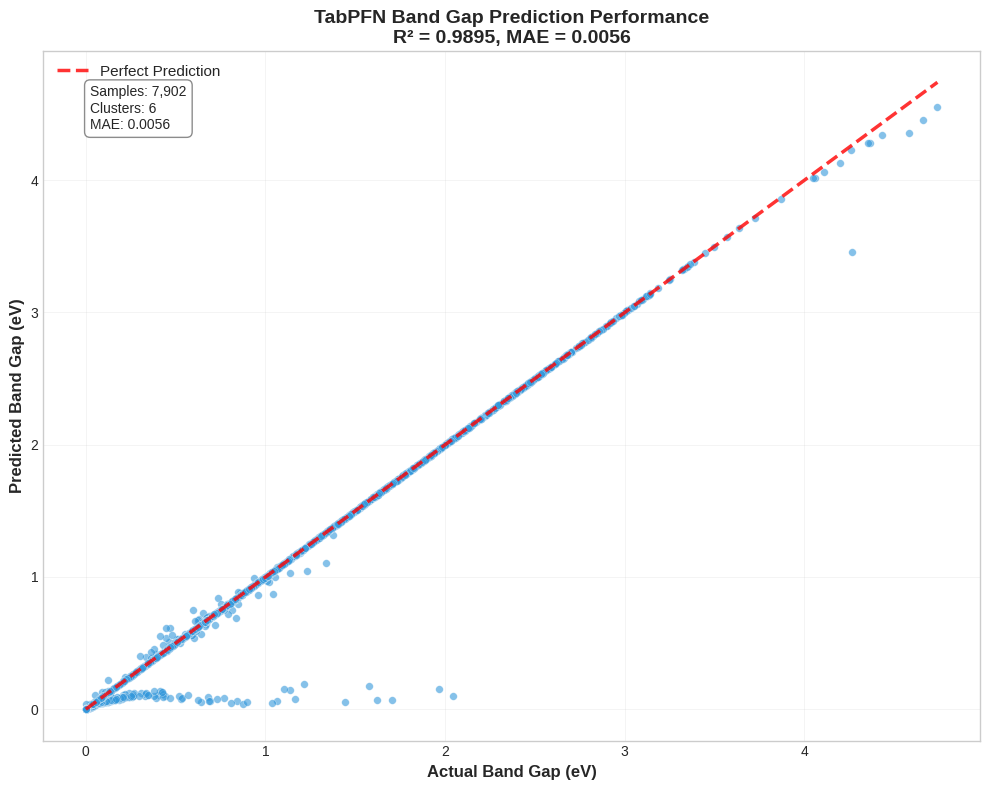

In [7]:
# Enhanced but clean visualization of TabPFN prediction performance
import matplotlib.pyplot as plt
import numpy as np

# Create clean, professional plot
plt.figure(figsize=(10, 8))

# Main scatter plot with better styling
plt.scatter(all_y_test, all_y_pred,
           alpha=0.6,
           s=30,
           color='#3498db',
           edgecolors='white',
           linewidth=0.3)

# Perfect prediction line
plt.plot([all_y_test.min(), all_y_test.max()],
         [all_y_test.min(), all_y_test.max()],
         'r--', lw=2.5, alpha=0.8, label='Perfect Prediction')

# Clean labels and title
plt.xlabel('Actual Band Gap (eV)', fontsize=12, fontweight='bold')
plt.ylabel('Predicted Band Gap (eV)', fontsize=12, fontweight='bold')
plt.title(f'TabPFN Band Gap Prediction Performance\nR² = {combined_r2:.4f}, MAE = {combined_mae:.4f}',
          fontsize=14, fontweight='bold')

# Clean grid
plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# Legend
plt.legend(fontsize=11, framealpha=0.9)

# Clean statistics box
textstr = (f'Samples: {len(all_y_test):,}\n'
          f'Clusters: {len(cluster_tabpfn_performance)}\n'
          f'MAE: {np.mean(np.abs(all_y_test - all_y_pred)):.4f}')

props = dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9, edgecolor='gray')
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()